In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/Colab Notebooks/Carpov/Data_set/

/content/drive/MyDrive/Colab Notebooks/Carpov/Data_set


Мы будем работать с данными агрегатора такси [Sigma Cabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). В зависимости от характеристик поездки требуется предсказать один из трех типов повышенного ценообразования: [1, 2, 3]. Таким образом, это поможет компании оптимально мэтчить такси и клиентов.

In [5]:
df = pd.read_csv('sigma_cabs.csv')
df.shape

(131662, 14)

In [6]:
# Занесем индекс колонку
df = df.set_index('Trip_ID')
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


Описание признаков:

1. **Trip_ID**: ID for TRIP
2. **Trip_Distance**: The distance for the trip requested by the customer
3. **TypeofCab**: Category of the cab requested by the customer
4. **CustomerSinceMonths**: Customer using cab services since n months; 0 month means current month
5. **LifeStyleIndex**: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. **ConfidenceLifeStyle_Index**: Category showing confidence on the index mentioned above
7. **Destination_Type**: Sigma Cabs divides any destination in one of the 14 categories.
8. **Customer_Rating**: Average of life time ratings of the customer till date
9. **CancellationLast1Month**: Number of trips cancelled by the customer in last 1 month
10. **Var1**, **Var2** and **Var3**: Continuous variables masked by the company. Can be used for modelling purposes
11. **Gender**: Gender of the customer

**SurgePricingType**: Target (can be of 3 types)


### EDA
Заполните пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом. Изобразите марицу корреляций и выведите топ5 пар самых коррелированных признаков.

Так как в сумме уникальных значений различных категориальных признаков окажется не супер-много, примените `One-Hot-Encoding` для них. Не забудьте в методе `pd.get_dummies` указать параметр `drop_first=True`.

In [7]:
###  Class Balancre
df["Surge_Pricing_Type"].value_counts()



Surge_Pricing_Type
2    56728
3    47720
1    27214
Name: count, dtype: int64

In [8]:
numeric_columns = df.loc[:,df.dtypes != object].columns
df.loc[:, df.dtypes != object].head(2)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_ID,,,,,,,,,
T0005689460,6.77,1.0,2.42769,3.905,0,40.0,46,60,2
T0005689461,29.47,10.0,2.78245,3.450,0,38.0,56,78,2


In [9]:
categorical_columns = df.loc[:,df.dtypes == object].columns
df.loc[:,df.dtypes == object].head(2)

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
Trip_ID,,,,
T0005689460,B,A,A,Female
T0005689461,B,B,A,Male


In [10]:
df[numeric_columns].isna().sum()

Trip_Distance                   0
Customer_Since_Months        5920
Life_Style_Index            20193
Customer_Rating                 0
Cancellation_Last_1Month        0
Var1                        71030
Var2                            0
Var3                            0
Surge_Pricing_Type              0
dtype: int64

In [11]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [12]:
df[numeric_columns].isna().sum()

Trip_Distance               0
Customer_Since_Months       0
Life_Style_Index            0
Customer_Rating             0
Cancellation_Last_1Month    0
Var1                        0
Var2                        0
Var3                        0
Surge_Pricing_Type          0
dtype: int64

In [18]:
df.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.015912,2.801448,2.849458,0.782838,62.474883,51.202800,75.099019,2.155747
std,25.522882,3.544411,0.207765,0.980675,1.037559,14.893324,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.687952,2.152500,0.000000,61.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.912815,3.582500,1.000000,61.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


<Axes: title={'center': 'Correlation_heatmap'}>

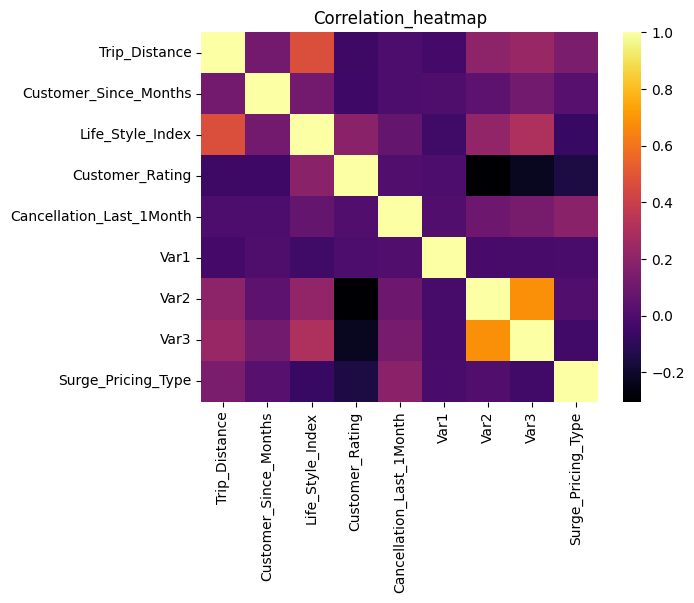

In [13]:
plt.title("Correlation_heatmap")
sns.heatmap(df[numeric_columns].corr(), cmap = 'inferno')

In [14]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0,i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(df, n = 5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
    return au_corr[0:n]

get_top_abs_correlations(df[numeric_columns])


Var2              Var3                0.683437
Trip_Distance     Life_Style_Index    0.468332
Life_Style_Index  Var3                0.303324
Customer_Rating   Var2                0.302968
Trip_Distance     Var3                0.231706
dtype: float64

In [15]:
from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])
cutter.get_feature_names_out()

array(['Trip_Distance', 'Customer_Since_Months', 'Customer_Rating',
       'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'], dtype=object)

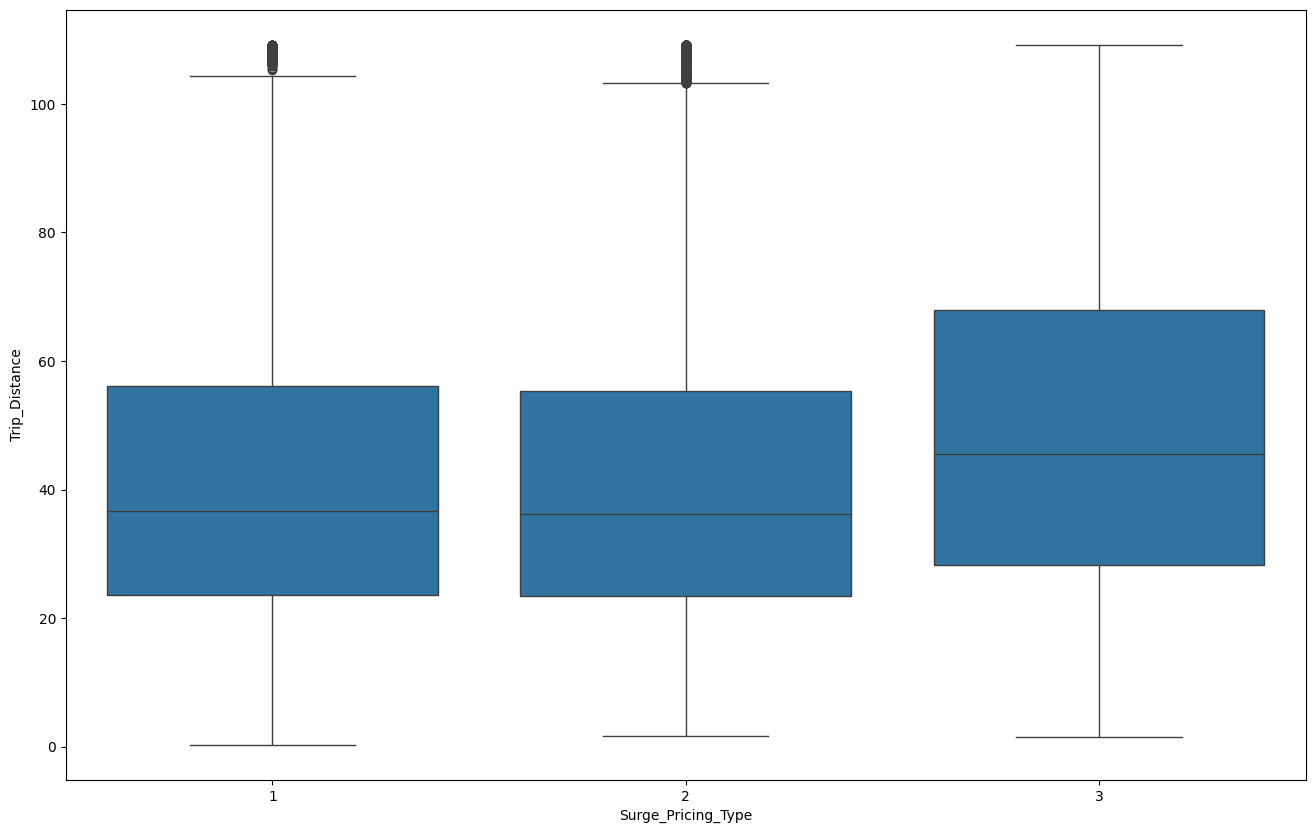

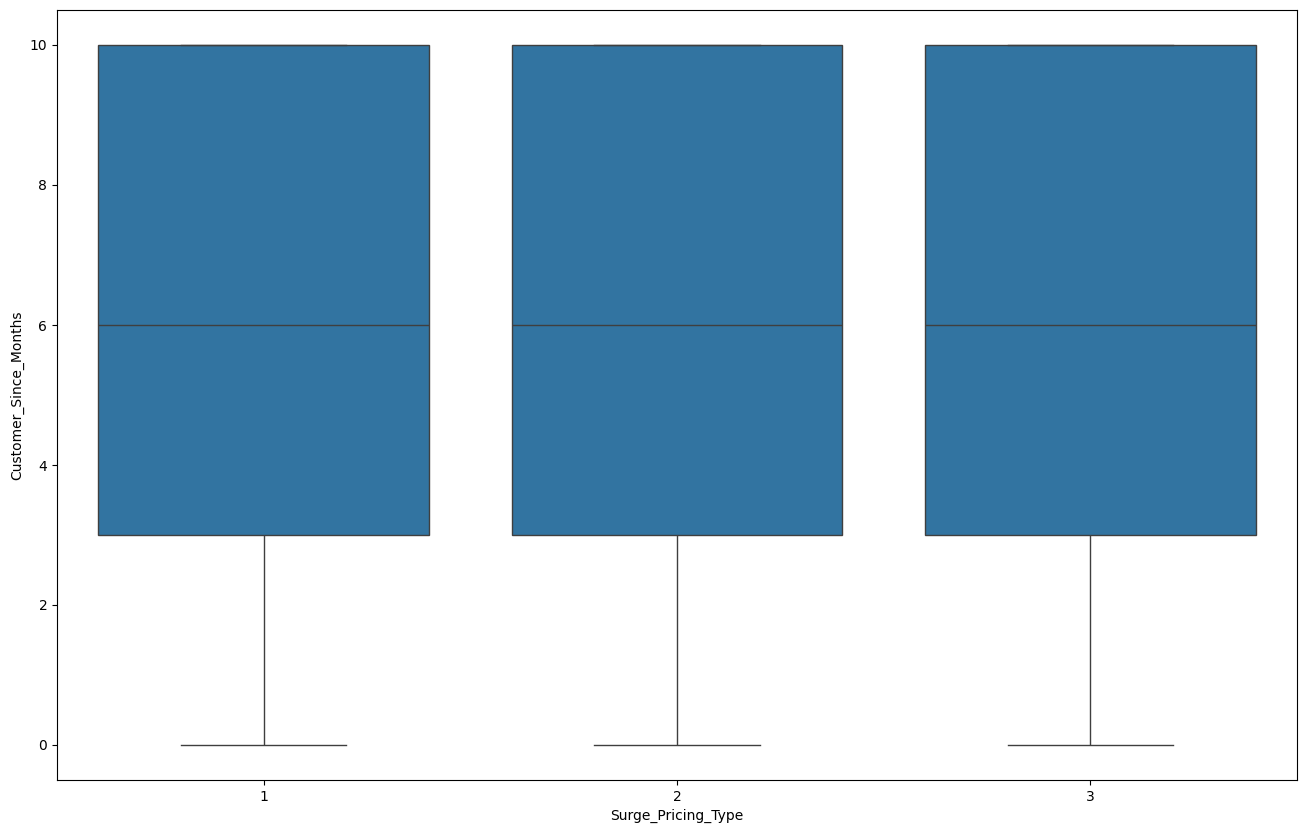

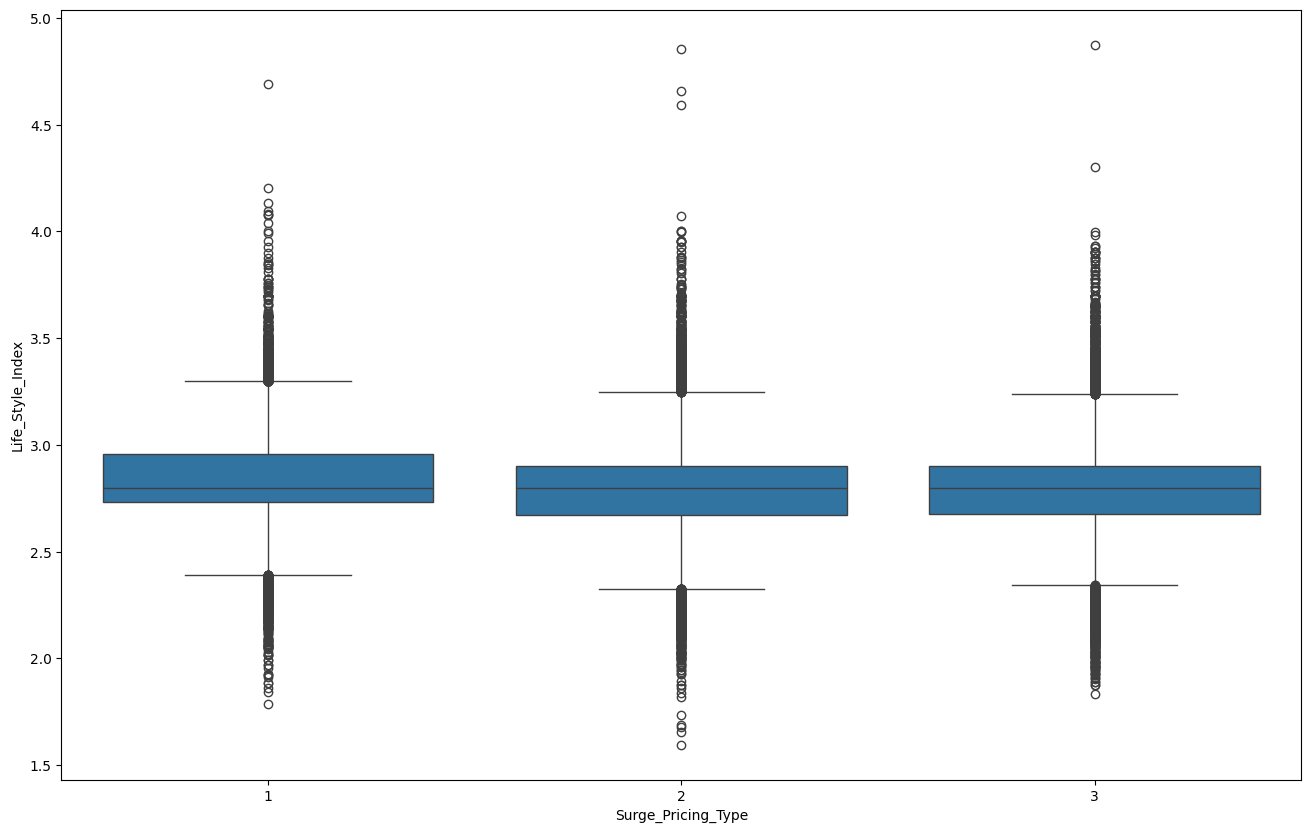

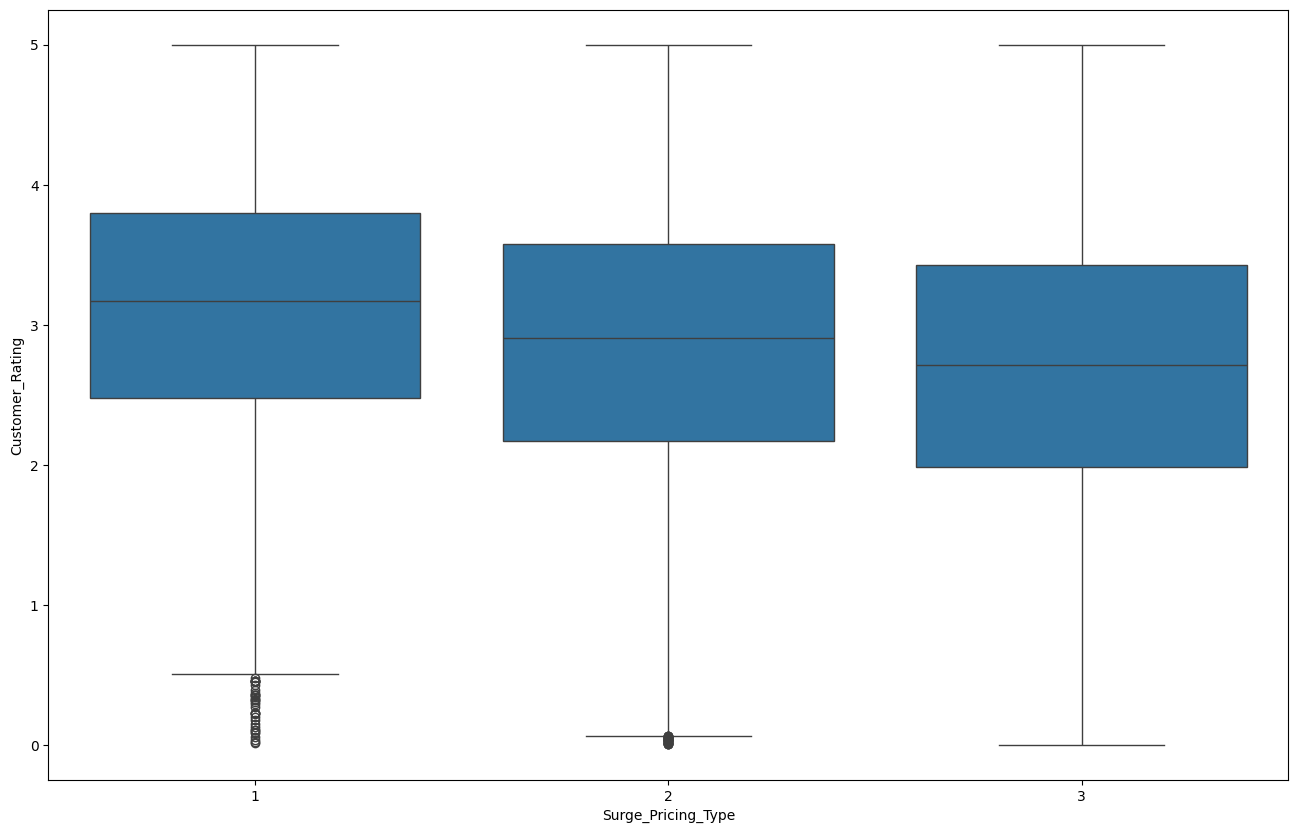

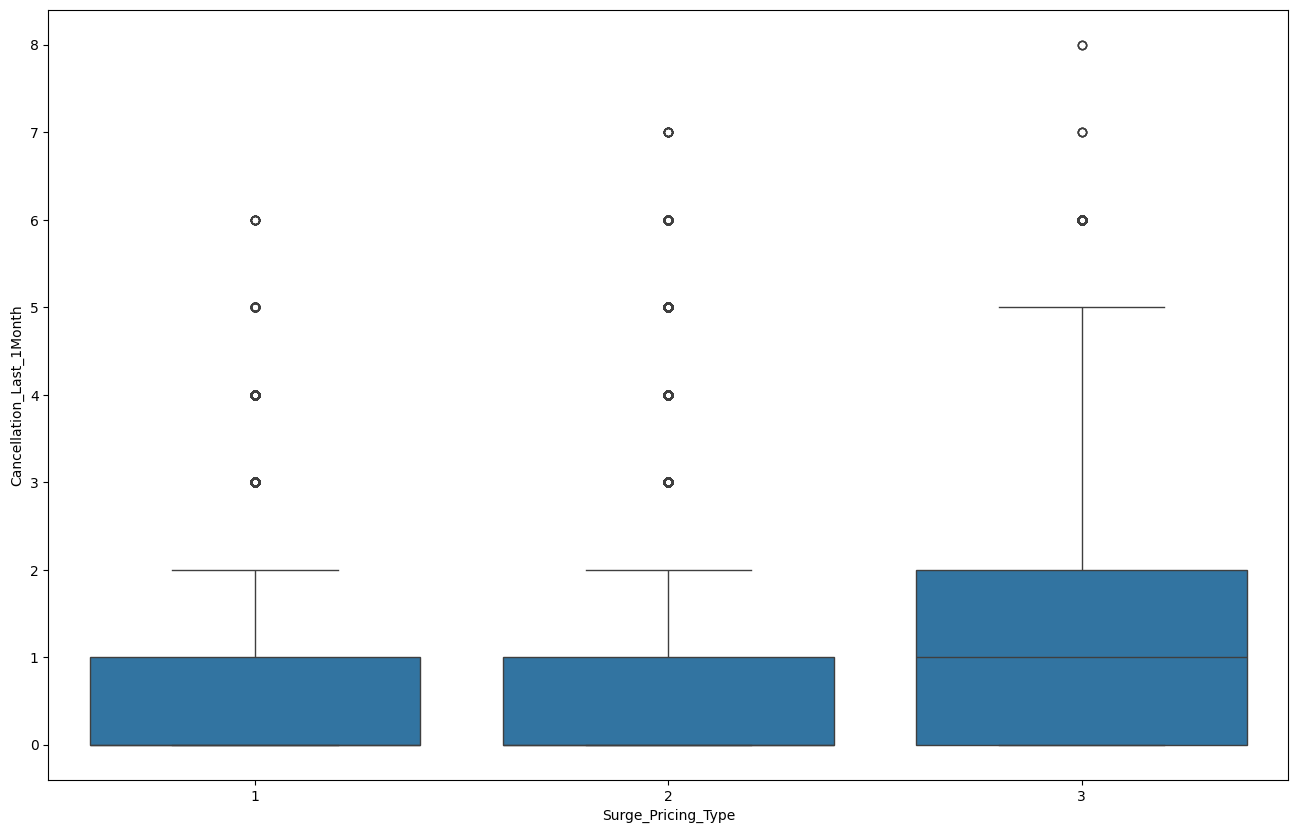

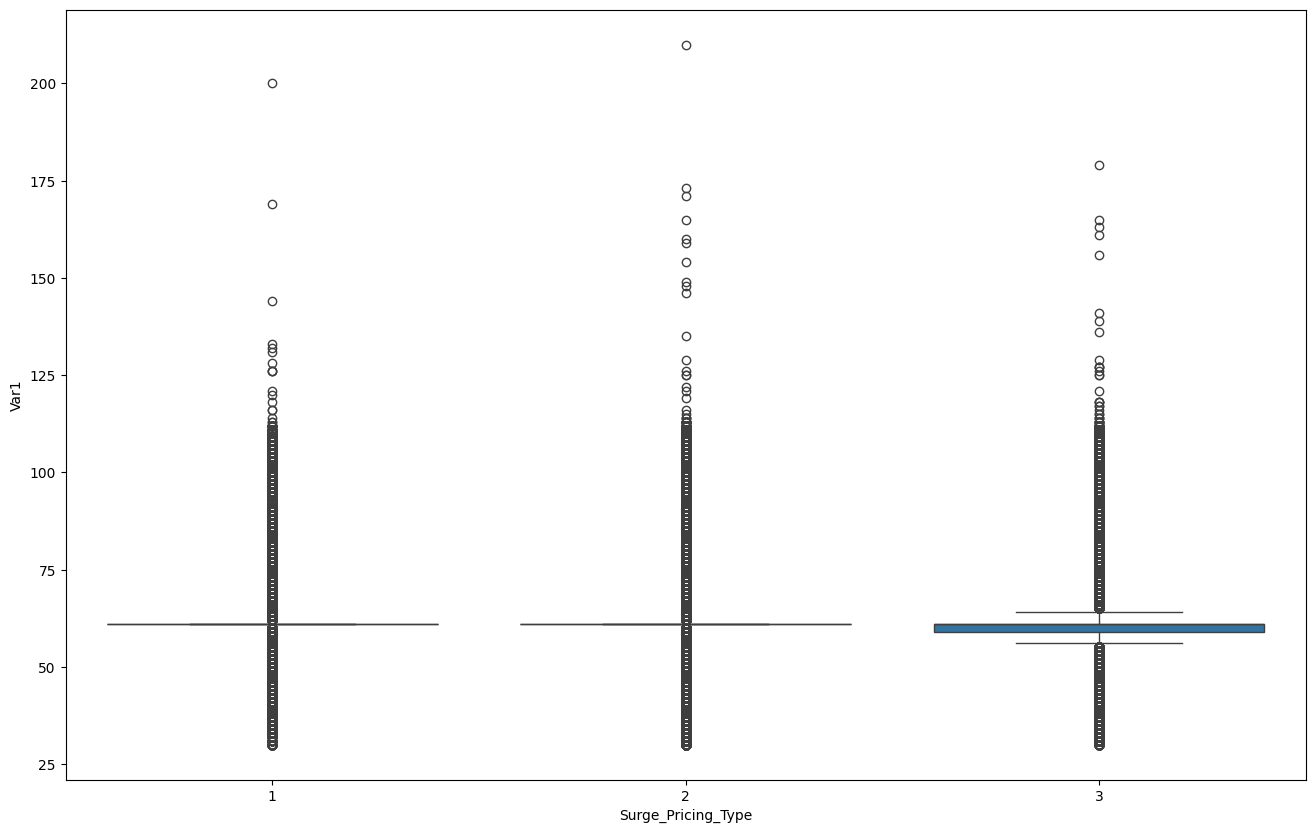

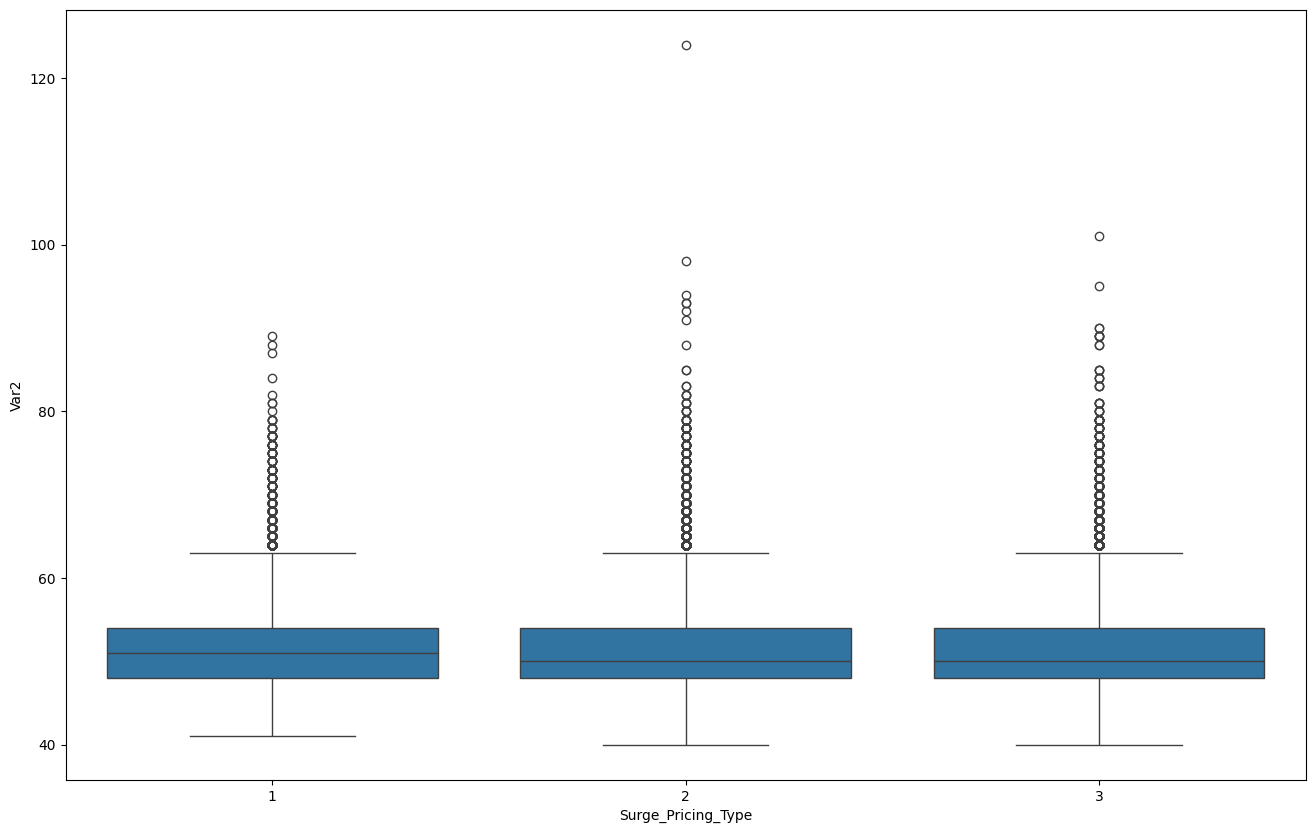

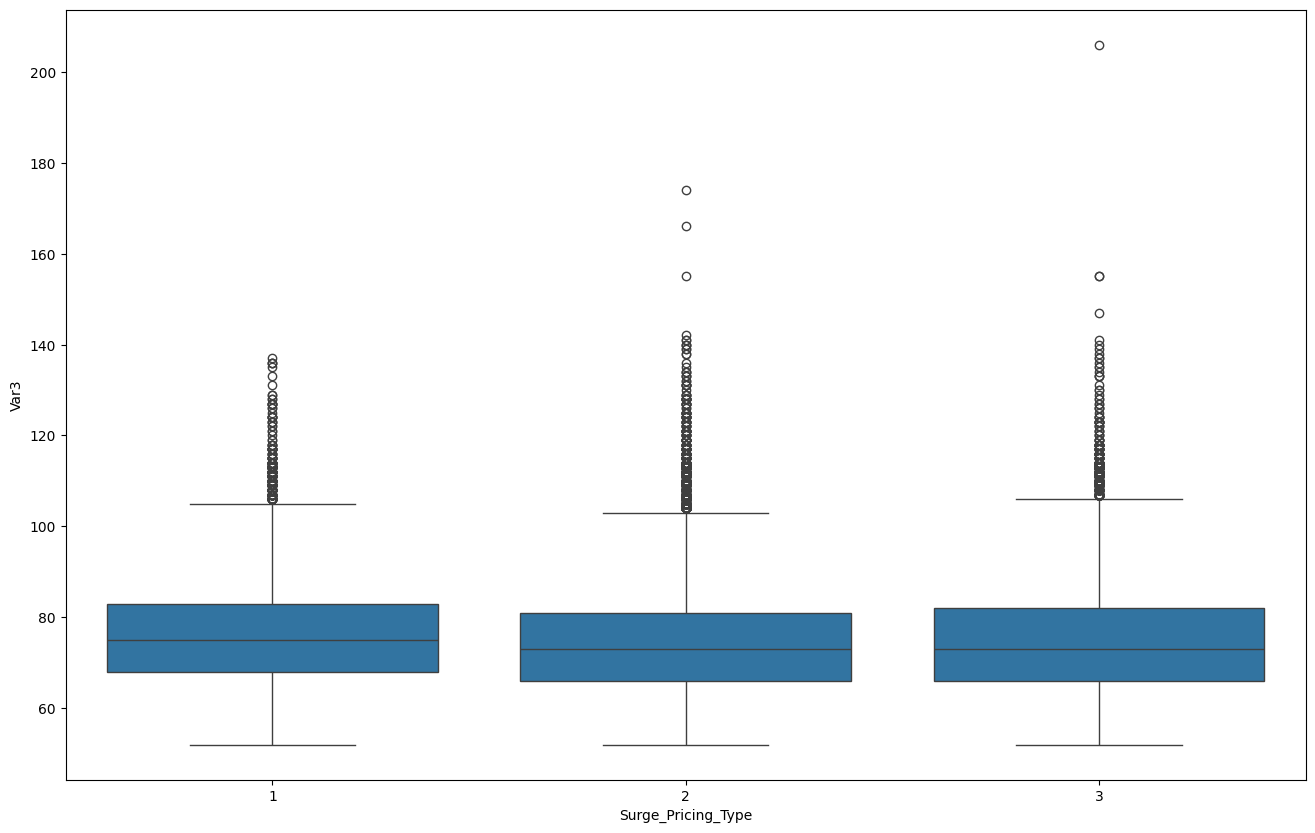

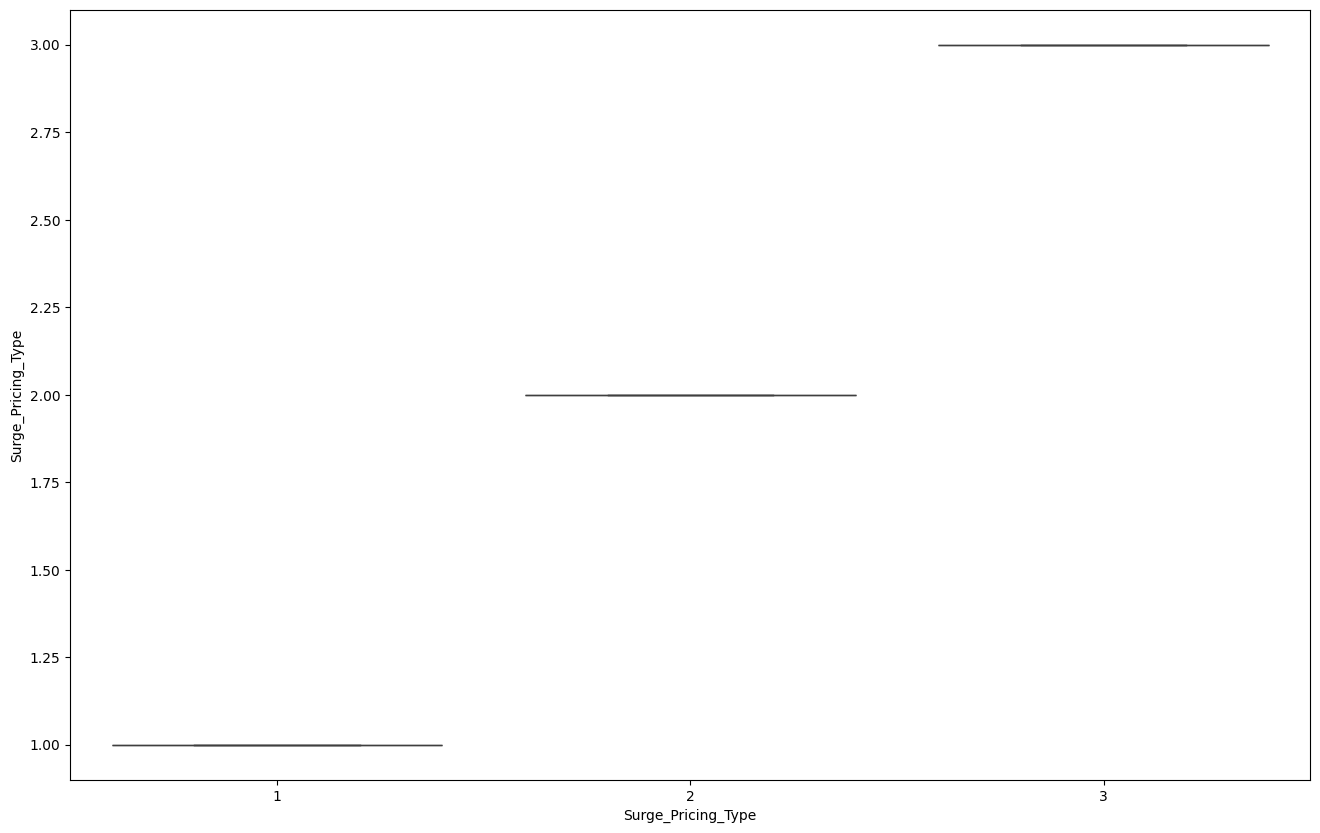

In [16]:
for col in numeric_columns:
  fig = plt.figure()
  fig.set_size_inches(16,10)

  sns.boxplot(y= col, x = df['Surge_Pricing_Type'], data = df)
  plt.show()

In [17]:
df.describe(include = object)

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,111452,111469,131662,131662
unique,5,3,14,2
top,B,B,A,Male
freq,31136,40355,77597,93900


In [18]:
for col in categorical_columns:
    most_recent = df.groupby(col).size().sort_values().index[-1]
    df[col] = df[col].fillna(most_recent)
df.describe(include = object)

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,131662,131662,131662,131662
unique,5,3,14,2
top,B,B,A,Male
freq,51346,60548,77597,93900


In [19]:
df.select_dtypes('object').nunique()

Type_of_Cab                     5
Confidence_Life_Style_Index     3
Destination_Type               14
Gender                          2
dtype: int64

In [20]:
df = pd.get_dummies(df, drop_first = True)
X = df.drop("Surge_Pricing_Type",axis = 1)
y = df["Surge_Pricing_Type"]

### Training

In [21]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test  = train_test_split(X, y,
                                                     test_size=0.2,
                                                     shuffle=True,
                                                     random_state=2022)

**Задание 1.** Обучите One-vs-Rest Logreg. Не забудьте в шаг добавить стандартизацию данных (через `StandardScaler`) Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg. Здесь и далее округляйте до 3 знака после запятой.

Чтобы отдельно и долго не вычислять метрики, можно воспользоваться `classification_report` из `sklearn.metrics`!

In [23]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

### Your code is here
pipe_lr = Pipeline([('scaler', StandardScaler()),
                  ("one_vs_rest", OneVsRestClassifier(LogisticRegression()))])
pipe_lr.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_rest',
                 OneVsRestClassifier(estimator=LogisticRegression()))])

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pipe_lr.predict(X_test), digits = 3))

              precision    recall  f1-score   support

           1      0.723     0.542     0.619      5372
           2      0.636     0.834     0.722     11349
           3      0.741     0.571     0.645      9612

    accuracy                          0.679     26333
   macro avg      0.700     0.649     0.662     26333
weighted avg      0.692     0.679     0.673     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()` из предложенных. Для лучшего набора гиперпараметров посчитайте те же самые метрики. Валидировать параметры необходимо по `accuracy`. В этот раз проведем настояющую процедуру Кросс-Валидации!

Для этого в метод `fit` передадим тренировочную часть наших данных, в параметр `cv` ничего не будем передавать (по дефолту 5-fold Кросс-Валидация будет проведена), а итоговые метрики замерим на тесте!

In [25]:
param_grid = {'one_vs_rest__estimator__penalty': ['l1', 'l2', 'elasticnet'],
              'one_vs_rest__estimator__C': [0.001, 0.01, 0.1, 1]}

In [26]:
### Your code is here
from sklearn.model_selection import GridSearchCV

grid_lr = GridSearchCV(pipe_lr, param_grid, cv = 5)
grid_lr.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('one_vs_rest',
                                        OneVsRestClassifier(estimator=LogisticRegression()))]),
             param_grid={'one_vs_rest__estimator__C': [0.001, 0.01, 0.1, 1],
                         'one_vs_rest__estimator__penalty': ['l1', 'l2',
                                                             'elasticnet']})

In [27]:
print(f"Best param:\t {grid_lr.best_params_}")
print(classification_report(y_test, grid_lr.predict(X_test), digits = 3))

Best param:	 {'one_vs_rest__estimator__C': 0.001, 'one_vs_rest__estimator__penalty': 'l2'}
              precision    recall  f1-score   support

           1      0.742     0.534     0.621      5372
           2      0.635     0.839     0.723     11349
           3      0.742     0.576     0.649      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.664     26333
weighted avg      0.696     0.681     0.675     26333



Изобразите три калибровочные кривые для Logistic Classifier: 0-vs-rest, 1-vs-rest, 2-vs-rest. Хорошо ли откалиброван обученный классификатор?

Заметьте, что `predict_proba` возвращает список из вероятностей для всех наших классов!

In [28]:
### Your code is here
grid_lr.predict_proba(X_test)


array([[0.3062245 , 0.27486411, 0.41891139],
       [0.02308103, 0.5404543 , 0.43646468],
       [0.02306905, 0.55678486, 0.42014609],
       ...,
       [0.48673502, 0.10505849, 0.4082065 ],
       [0.5666375 , 0.18013107, 0.25323143],
       [0.13873848, 0.59998973, 0.26127179]])

In [29]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)

y_ohe = ohe.fit_transform(y_test.values.reshape(-1,1))

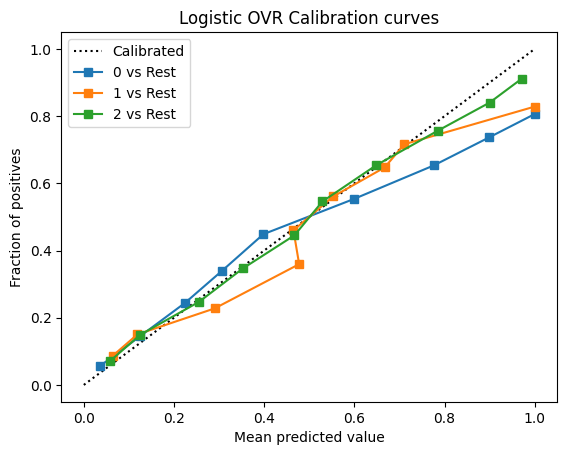

In [30]:
from sklearn.calibration import calibration_curve
plt.plot(figsize=(8,8))
plt.plot ([0,1], [0,1], "k:", label = 'Calibrated')

for i in range(3):
    probs_at_position = grid_lr.predict_proba(X_test)[:,i]
    prob_true, prob_pred = calibration_curve(y_ohe[:,i],
                                             probs_at_position,
                                             n_bins = 10)
    plt.plot(prob_true, prob_pred, "s-", label = f"{i} vs Rest")
plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.title('Logistic OVR Calibration curves')
plt.legend();
plt.show()

**Задание 2.** Обучите логистическую регрессию с гиперпараметрами из первого задания на полиномиальных признаках до 4 степени. Сравните метрики с первым заданием.


Пример: Пусть у нас был единственный признак

$$
d_j = [1, 2, 3, 4]
$$

Тогда полиномиальные признаки до 4 степени от такого будут иметь вид:

$$
d_j^1 = [1, 2, 3, 4]
$$

$$
d_j^2 = [1, 4, 9, 16]
$$

$$
d_j^3 = [1, 8, 27, 64]
$$

$$
d_j^4 = [1, 16, 81, 256]
$$

P.S. Бинарные колонки нет смысла возводить в какие-то степени, поэтому возьмем исключительно вещественные из базовых.

Для этого можно воспользоваться классическим циклом (или уроком из занятия про `Sberbank Housing Market`). Положите модифицированный датасет в переменную `X_polinomial`!

P.S.S Зачастую еще, создаваю полиномиальные фичи, учитывают "пересечения" признаков, то есть, например, из векторов признаков $d_j, d_i$ генерируют не просто новые степени $d_j^2, d_i^2, d_j^3, d_i^3...$, а еще и признаки вида $d_j \cdot d_i, d_j^2 \cdot d_i, d_j \cdot d_i^2...$, но здесь ограничьтесь просто степенями!

In [31]:
### Создание полиномиальных признаков

X_polinomial = X.copy()
for col in numeric_columns.drop('Surge_Pricing_Type'):
    data_part = pd.concat([X[col]**(i+1) for i in range(4)], axis = 1)
    data_part.columns = [col + f"_power_{i+1}" for i in range(4)]

    X_polinomial = X_polinomial.drop(col, axis = 1)
    X_polinomial = pd.concat((X_polinomial, data_part), axis = 1)
X_polinomial.shape

### Your code is here

(131662, 52)

In [32]:
X_pol_train, X_pol_test, y_train, y_test  = train_test_split(X_polinomial, y,
                                                             test_size=0.2,
                                                             shuffle=True,
                                                             random_state=2022)

In [45]:
### Your code is here
logit_lr_2 = LogisticRegression(penalty = 'l2', C = 0.001)
pipe_lr_2 = Pipeline([('scaler', StandardScaler()),
                      ('one_vs_rest', OneVsRestClassifier(logit_lr_2))])
pipe_lr_2.fit(X_pol_train, y_train)




Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_rest',
                 OneVsRestClassifier(estimator=LogisticRegression(C=0.001)))])

In [46]:
print(classification_report(y_test, pipe_lr_2.predict(X_pol_test), digits = 3))


              precision    recall  f1-score   support

           1      0.748     0.532     0.622      5372
           2      0.636     0.837     0.723     11349
           3      0.741     0.584     0.653      9612

    accuracy                          0.682     26333
   macro avg      0.708     0.651     0.666     26333
weighted avg      0.697     0.682     0.677     26333



По аналогии с первым заданием изобразите три калибровочные кривые. Стало ли лучше?

In [37]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)
y_ohe = ohe.fit_transform(y_test.values.reshape(-1,1))

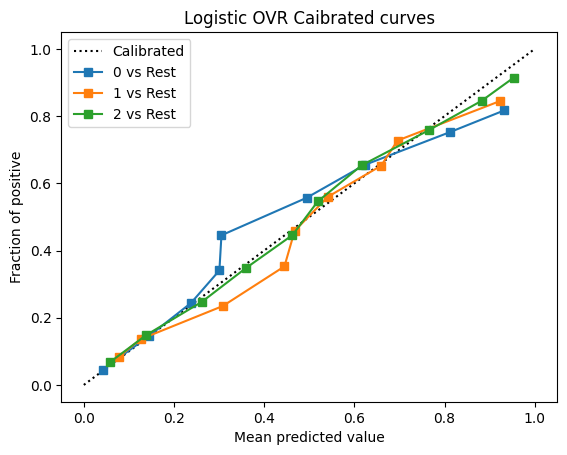

In [38]:
### Your code is here
plt.plot(figsize = (8,8))
plt.plot([0,1], [0,1], "k:", label = "Calibrated")

for i in range(3):
    prob_pos = pipe_lr_2.predict_proba(X_test)[:,i]
    prob_true, prob_pred = calibration_curve(y_ohe[:,i], prob_pos, n_bins = 10)
    plt.plot(prob_true, prob_pred, 's-', label = f'{i} vs Rest')
plt.ylabel("Fraction of positive")
plt.xlabel("Mean predicted value")
plt.title('Logistic OVR Caibrated curves')
plt.legend()
plt.show()

**Задание 3.** Обучите на датасете без полиномиальных признаков One-vs-One `SGDClassifier` из `sklearn.linear_model`, который использует стохастический градиентный спуск (узнаете о нем позже) и может обучать как `SVM`, так и, например, `LogReg`, если указать в качестве параметра `loss` либо `hinge`, либо `log` соответственно!

Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg.

In [47]:
X_train, X_test, y_train, y_test  = train_test_split(X, y,
                                                     test_size=0.2,
                                                     shuffle=True,
                                                     random_state=2022)

In [49]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

### Your code is here
pipe_ovo = Pipeline([('scaler', StandardScaler()),
             ('one_vs_one', OneVsOneClassifier(SGDClassifier()))])
pipe_ovo.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_one', OneVsOneClassifier(estimator=SGDClassifier()))])

In [50]:
print(classification_report(y_test, pipe_ovo.predict(X_test), digits = 3))

              precision    recall  f1-score   support

           1      0.748     0.521     0.614      5372
           2      0.626     0.870     0.728     11349
           3      0.756     0.536     0.627      9612

    accuracy                          0.677     26333
   macro avg      0.710     0.642     0.656     26333
weighted avg      0.698     0.677     0.668     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()`. При этом переберите всевозможные функции потерь. Таким образом, при `loss = 'hinge'`, мы обучим SVM, при `loss = 'log'` мы обучим логистическую регрессию и т.д.

Используйте прием с Кросс-Валидацией при подборе параметров, как ранее, а также замерьте метрики на тесте.

In [51]:
param_grid = {'one_vs_one__estimator__loss': ['hinge', 'log', 'modified_huber'],
              'one_vs_one__estimator__penalty': ['l1', 'l2'],
              'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1]}

In [53]:
### Your code is here
grid_ovo = GridSearchCV(pipe_ovo, param_grid, cv = 5)
grid_ovo.fit(X_test, y_test)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('one_vs_one',
                                        OneVsOneClassifier(estimator=SGDClassifier()))]),
             param_grid={'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1],
                         'one_vs_one__estimator__loss': ['hinge', 'log',
                                                         'modified_huber'],
                         'one_vs_one__estimator__penalty': ['l1', 'l2']})

In [54]:

print(f'Best params:\t{grid_ovo.best_params_}')
print(classification_report(y_test, grid_ovo.predict(X_test), digits = 3))


Best params:	{'one_vs_one__estimator__alpha': 0.01, 'one_vs_one__estimator__loss': 'log', 'one_vs_one__estimator__penalty': 'l2'}
              precision    recall  f1-score   support

           1      0.755     0.522     0.617      5372
           2      0.638     0.825     0.720     11349
           3      0.730     0.603     0.660      9612

    accuracy                          0.682     26333
   macro avg      0.707     0.650     0.666     26333
weighted avg      0.695     0.682     0.677     26333



Можно ли однозначно сказать, какой подход оказался лучше: One-vs-Rest или One-vs-One?